In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('C:/Users/Drew/Documents/Datasets/Consumer Electronics/apple_stock.csv')

In [3]:
data.set_index('Date', inplace=True)

In [4]:
data.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600
2014-01-09,19.528570,19.530714,19.119642,19.161428,16.798664,279148800
2014-01-10,19.279642,19.314285,18.968214,19.033571,16.686569,304976000
2014-01-13,18.925358,19.375000,18.924286,19.133215,16.773926,378492800
2014-01-14,19.222143,19.526072,19.202143,19.513929,17.107697,332561600


In [5]:
pd.to_datetime(data.index)

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
               '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
               '2023-10-30', '2023-10-31'],
              dtype='datetime64[ns]', name='Date', length=2475, freq=None)

In [6]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2475 entries, 2014-01-02 to 2023-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2475 non-null   float64
 1   High       2475 non-null   float64
 2   Low        2475 non-null   float64
 3   Close      2475 non-null   float64
 4   Adj Close  2475 non-null   float64
 5   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.4+ KB


# Data Visualization

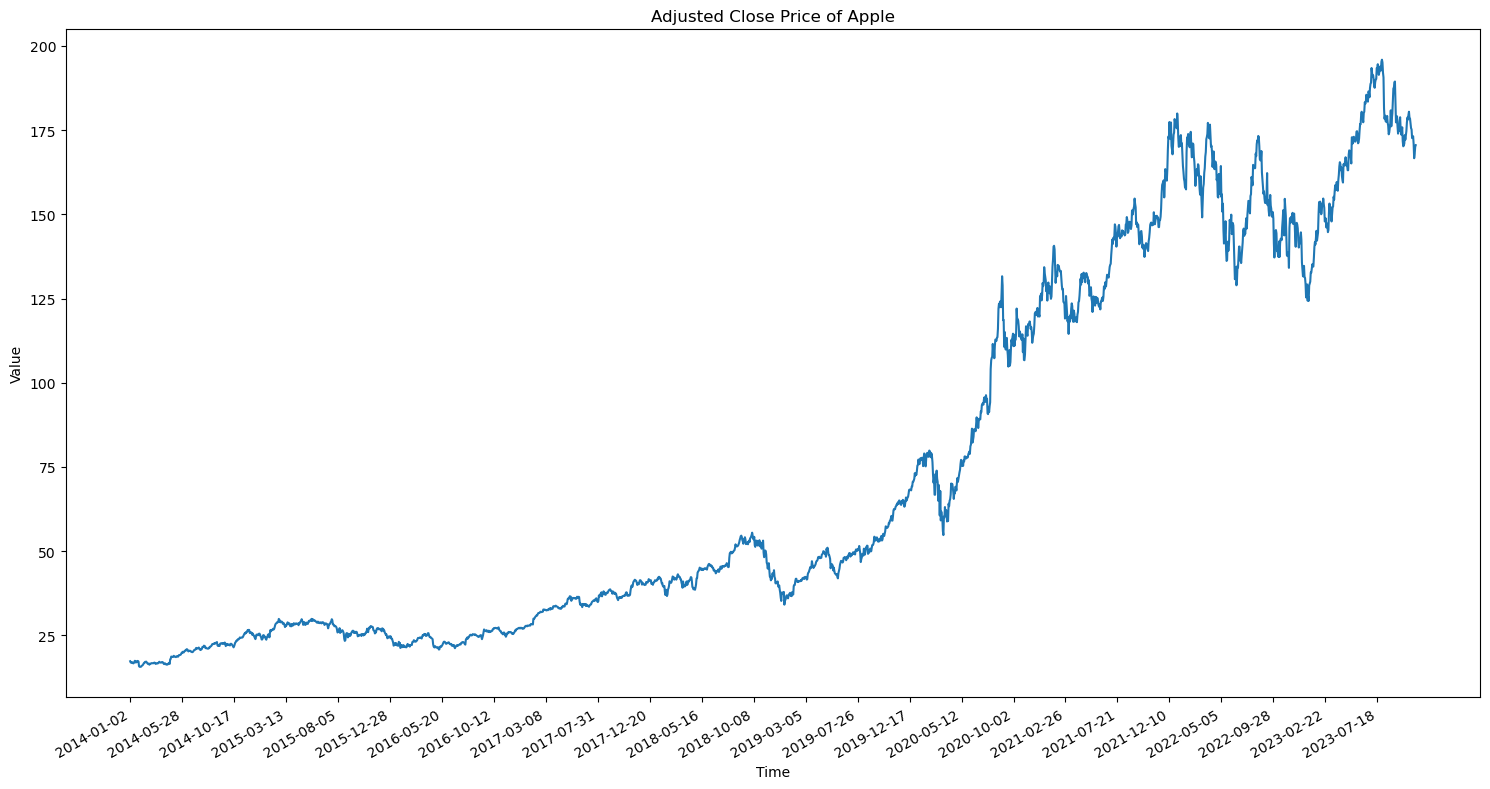

In [8]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['Adj Close'], label='Adj Close')
ax.set_title('Adjusted Close Price of Apple')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,2475,100))
pt.tight_layout()

There is a increasing trend

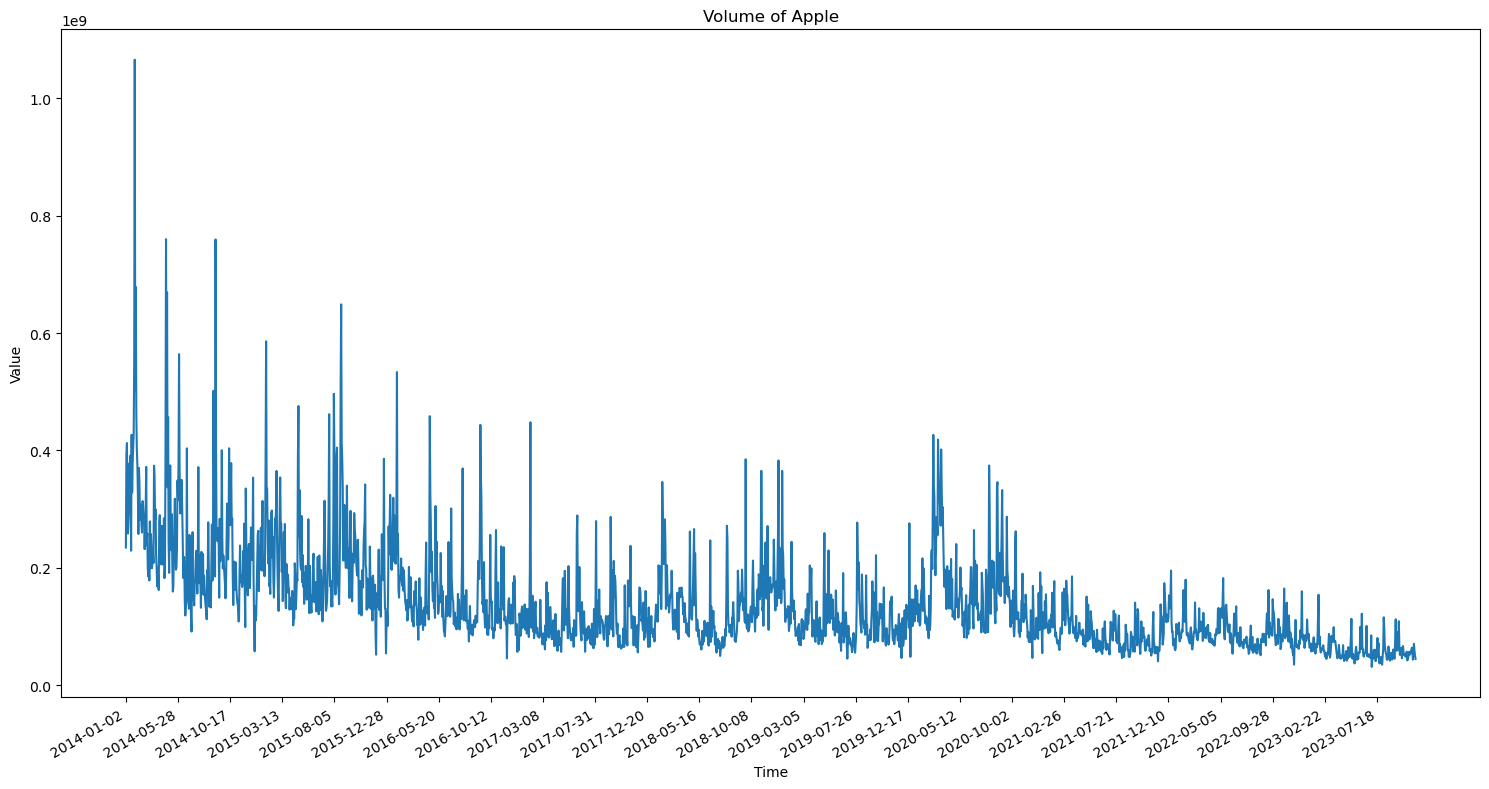

In [9]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['Volume'], label='Volume')
ax.set_title('Volume of Apple')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,2475,100))
pt.tight_layout()

It seems that the volume of this stock is slowly decreasing 

R-Value:  0.9226372199067167
P-Value:  0.0
Std Err:  0.0005995818031637011


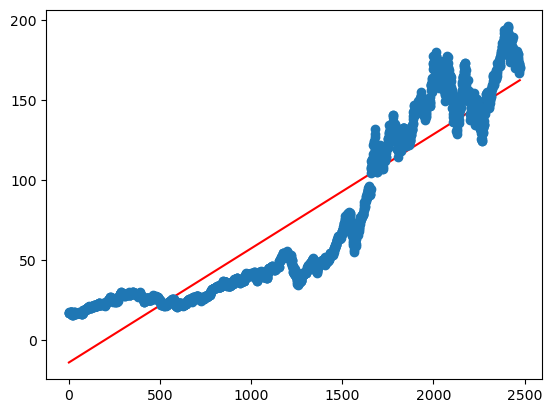

In [10]:
xi = np.arange(0,2475)
y = data['Adj Close']

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print('R-Value: ' , r_value)
print('P-Value: ' , p_value)
print('Std Err: ' , std_err)

line = slope*xi  + intercept
pt.plot(xi, line, 'r', xi, y, 'o')
pt.show()


In [11]:
std_dev = data['Adj Close'].std()
print(f' Standard Deviation: {std_dev}')

mean = np.mean(data['Adj Close'])
print(f' Mean: {mean}')

coef_var = (std_dev / mean)*100
print(f' Coefficient Variance: {coef_var} %')

 Standard Deviation: 55.248195027037944
 Mean: 74.09712394483162
 Coefficient Variance: 74.56186162930226 %


# Moving Average Window

In [12]:
data['Moving Average (10)'] = data['Adj Close'].rolling(window=10).mean()
data['Moving Average (30)'] = data['Adj Close'].rolling(window=30).mean()
data['Moving Average (50)'] = data['Adj Close'].rolling(window=50).mean()
data['Moving Average (100)'] = data['Adj Close'].rolling(window=100).mean()

In [13]:
data.head(20)

,Open,High,Low,Close,Adj Close,Volume,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100)
Date,,,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800,NaN,NaN,NaN,NaN
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600,NaN,NaN,NaN,NaN
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800,NaN,NaN,NaN,NaN
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200,NaN,NaN,NaN,NaN
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600,NaN,NaN,NaN,NaN
2014-01-09,19.528570,19.530714,19.119642,19.161428,16.798664,279148800,NaN,NaN,NaN,NaN
2014-01-10,19.279642,19.314285,18.968214,19.033571,16.686569,304976000,NaN,NaN,NaN,NaN
2014-01-13,18.925358,19.375000,18.924286,19.133215,16.773926,378492800,NaN,NaN,NaN,NaN
2014-01-14,19.222143,19.526072,19.202143,19.513929,17.107697,332561600,NaN,NaN,NaN,NaN


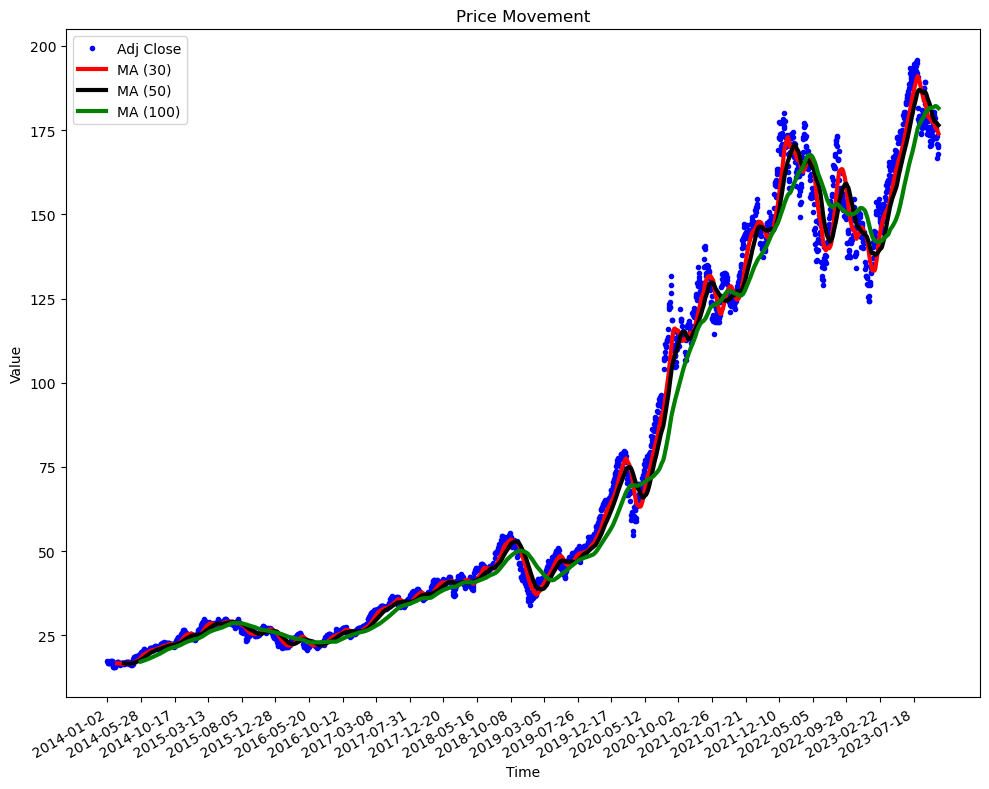

In [14]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Adj Close'], 'b.', label='Adj Close')
ax.plot(data['Moving Average (30)'], 'r-', label='MA (30)', linewidth=3)
ax.plot(data['Moving Average (50)'], 'k-',label='MA (50)', linewidth=3)
ax.plot(data['Moving Average (100)'], 'g-',label='MA (100)', linewidth=3)
ax.set_title('Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,2475, 100))
fig.autofmt_xdate()
pt.tight_layout()

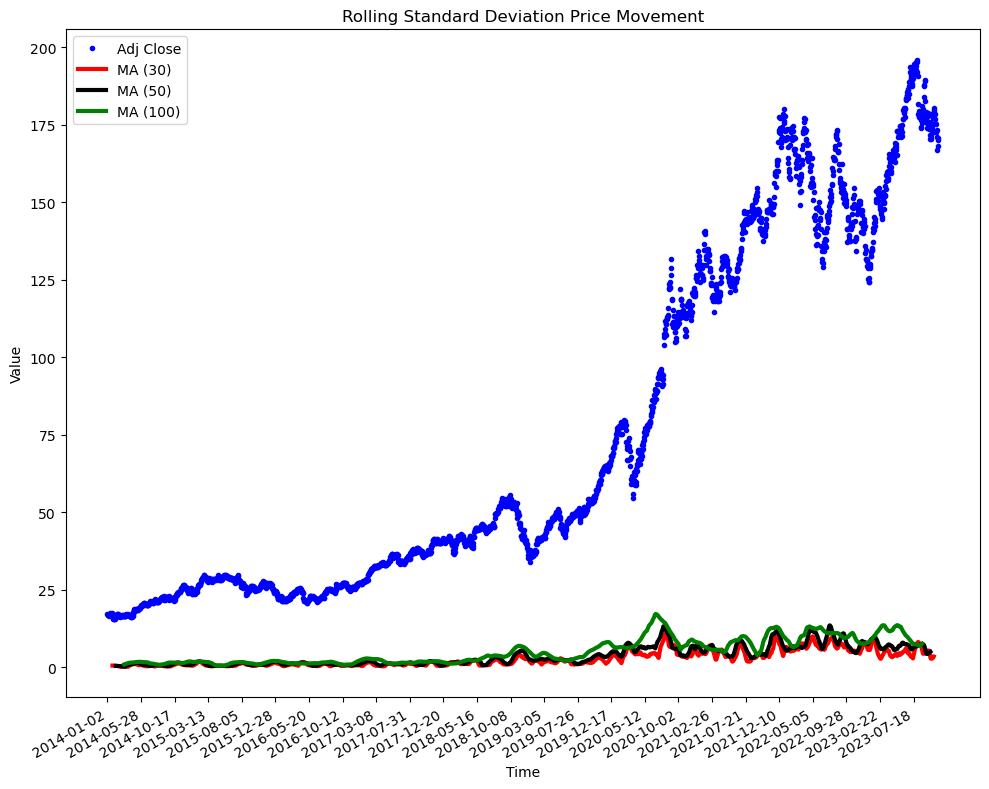

In [15]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Adj Close'], 'b.', label='Adj Close')
moving_average_30 = data['Adj Close'].rolling(window=30, center=True).std()
moving_average_50 = data['Adj Close'].rolling(window=50, center=True).std()
moving_average_100 = data['Adj Close'].rolling(window=100, center=True).std()
ax.plot(moving_average_30, 'r-', label='MA (30)', linewidth=3)
ax.plot(moving_average_50, 'k-',label='MA (50)', linewidth=3)
ax.plot(moving_average_100, 'g-',label='MA (100)', linewidth=3)

ax.set_title('Rolling Standard Deviation Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,2475, 100))
fig.autofmt_xdate()
pt.tight_layout()

The standard deviation is fairly constant

pct_change() in this case is basically calculating the percentage change of the current element from previous element. In this case, Adj Close price the current day and the previous day. 

In [16]:
data['Daily Return'] = data['Adj Close'].pct_change()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100),Daily Return
Date,,,,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800,NaN,NaN,NaN,NaN,NaN
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600,NaN,NaN,NaN,NaN,-0.021966
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800,NaN,NaN,NaN,NaN,0.005453
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200,NaN,NaN,NaN,NaN,-0.007152
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600,NaN,NaN,NaN,NaN,0.006333


In [17]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100),Daily Return
Date,,,,,,,,,,,
2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000,175.483813,175.066360,176.980039,181.927798,-0.013492
2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300,174.103632,174.771748,176.786694,181.803484,-0.024606
2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100,173.042030,174.545713,176.671246,181.696142,0.007969
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000,172.200137,174.290050,176.587356,181.623336,0.012305
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.545319,44846000,171.562978,174.013747,176.486089,181.527896,0.002819


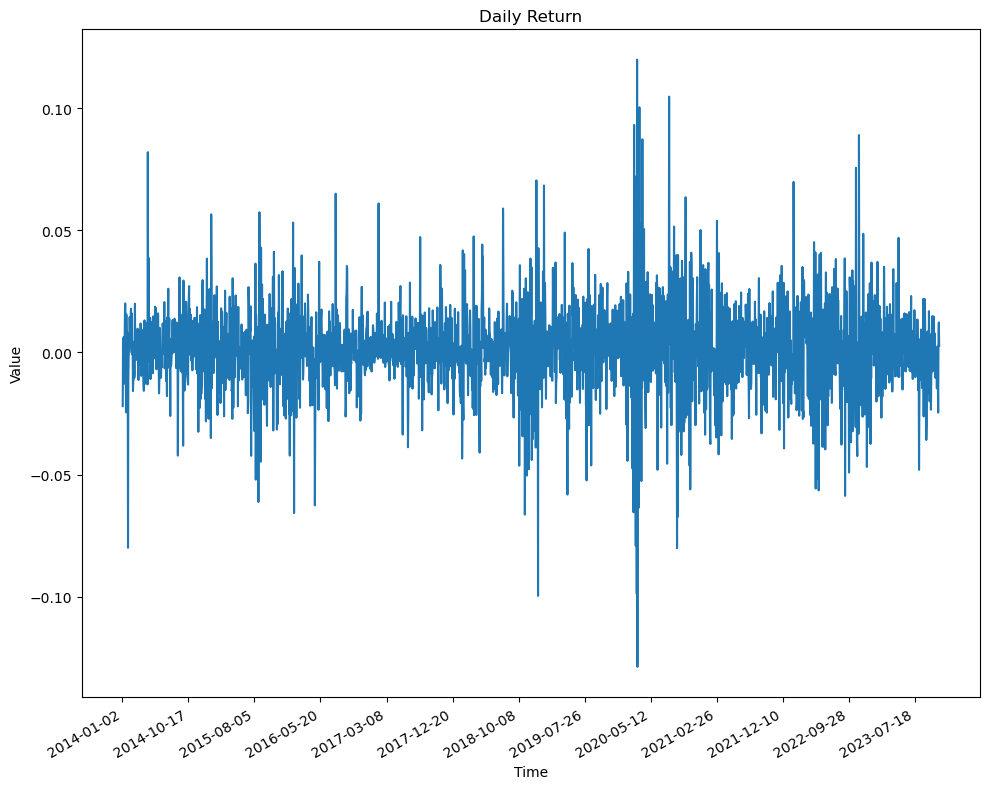

In [18]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Daily Return'], label='Daily Return')
ax.set_title('Daily Return')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
pt.xticks(np.arange(0,2475,200))
fig.autofmt_xdate()
pt.tight_layout()

# Stationary Check

In [19]:
adf_results = adfuller(data['Adj Close'])
print(f' ADF Statistic: {adf_results[0]}')
print(f' P-Value: {adf_results[1]}')

 ADF Statistic: -0.1001816367976703
 P-Value: 0.9494204387615286


In [20]:
adf_results = adfuller(np.diff(data['Adj Close'], n=1))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print('The Time Series is not stationary')

 ADF Statistic: -11.323135814699944
 P-Value: 1.160855571737269e-20
 The time series is stationary


In [21]:
data_diff = np.diff(data['Adj Close'], n=1)

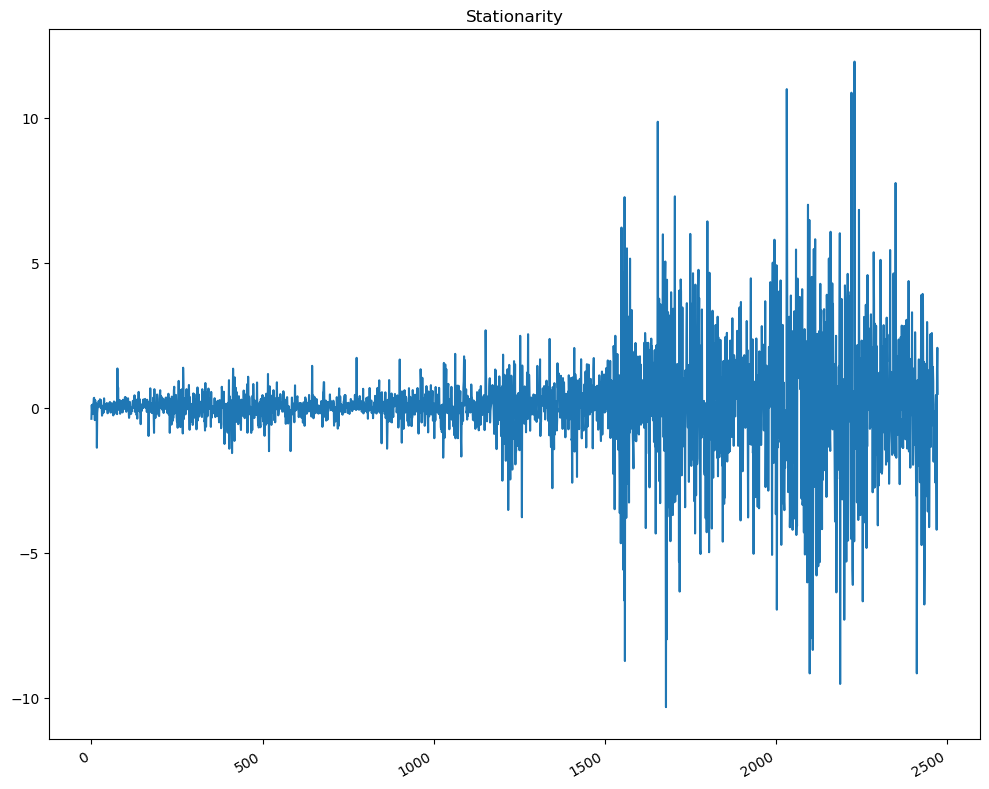

In [22]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data_diff)
ax.set_title('Stationarity')
fig.autofmt_xdate()
pt.tight_layout()

First order integration

<function plot_acf at 0x0000028341D74900>


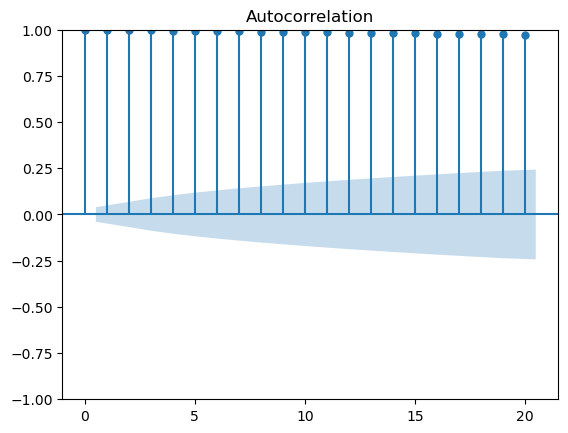

In [23]:
plot_acf(data['Adj Close'], lags=20)
print(plot_acf)

<function plot_pacf at 0x0000028341D747C0>


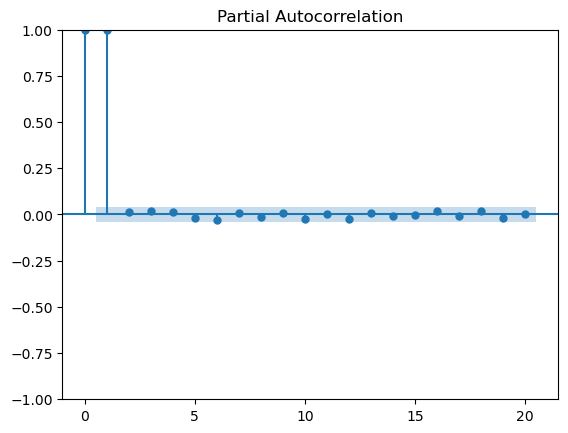

In [24]:
plot_pacf(data['Adj Close'], lags=20)
print(plot_pacf)

# Model Selection

In [27]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []  # Initialize an empty list to store results
    for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.
        try:
            # Fit an ARIMA(p,d,q) model using the SARIMAX function.
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic  # Calculate the model AIC
            results.append([order, aic])
        except Exception as e:
            print(f"Error fitting SARIMAX with order {order}: {e}")
            continue

    if not results:
        print("No models were successfully fitted.")
        return pd.DataFrame()  # Return an empty DataFrame if no models were fitted

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # Sorting the results in ascending order. The lower the AIC, the better.
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [28]:
from itertools import product

ps = range(0,10,1)
qs = range(0,10,1)
d = 1

arima_list = list(product(ps,qs))

In [29]:
train = data['Adj Close'][:-261]
test = data['Adj Close'][-261:]

In [30]:
train.shape

(2214,)

In [31]:
test.shape

(261,)

In [32]:
results = optimize_ARIMA(train, arima_list, d)
results

C:\Users\Drew\AppData\Local\Temp\ipykernel_23804\1285813300.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

,"(p,q)",AIC
0,"(4, 6)",8255.666660
1,"(6, 4)",8260.573038
2,"(5, 4)",8262.619693
3,"(5, 5)",8262.718382
4,"(6, 8)",8263.126678
...,...,...
95,"(1, 2)",8300.225572
96,"(3, 1)",8300.355752
97,"(1, 3)",8300.541370
98,"(3, 2)",8301.019480


Best model is ARIMA(2,1,2). Since ARIMA(6,1,4) and ARIMA(2,1,2) has very similar AIC value, just a slight difference, The ARIMA(2,1,2) is chosen because it is less complex due to the smaller parameters (order of AR and MA). 

In the context of negative number, a value closer to zero is consider larger. Thus, moving from a more negative number to a less negative number is considered ascending. Hence, the larger the negative value away from 0, the smaller the AIC.

# Residual Analysis

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


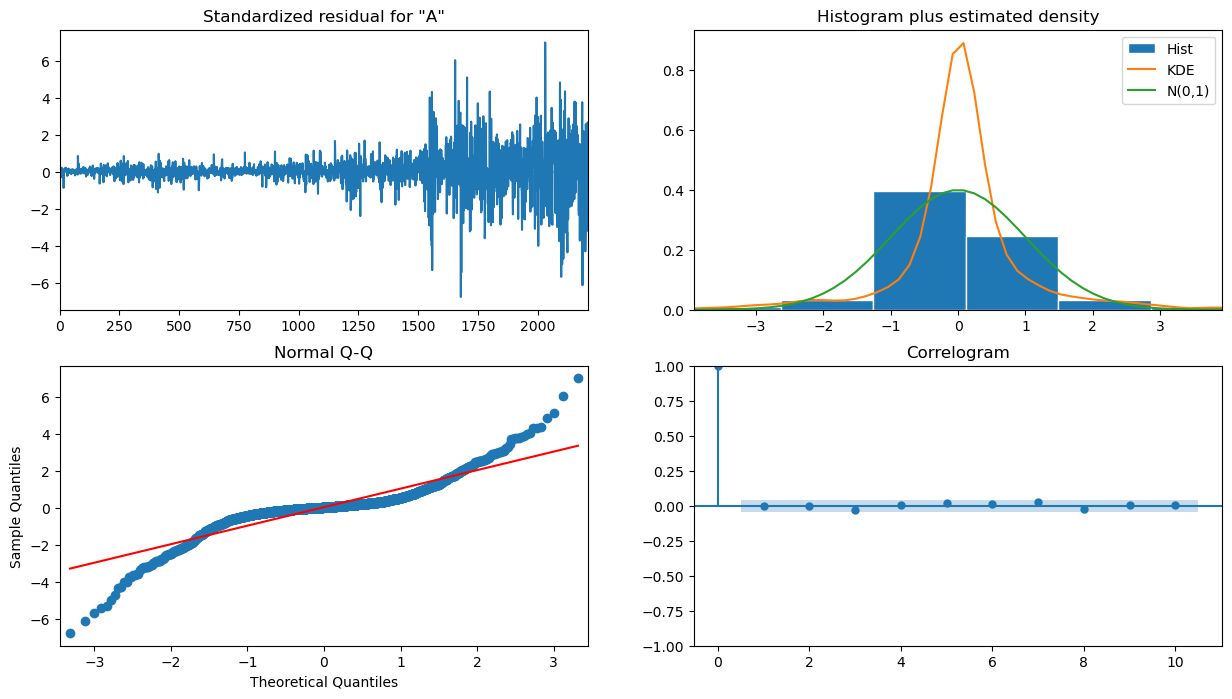

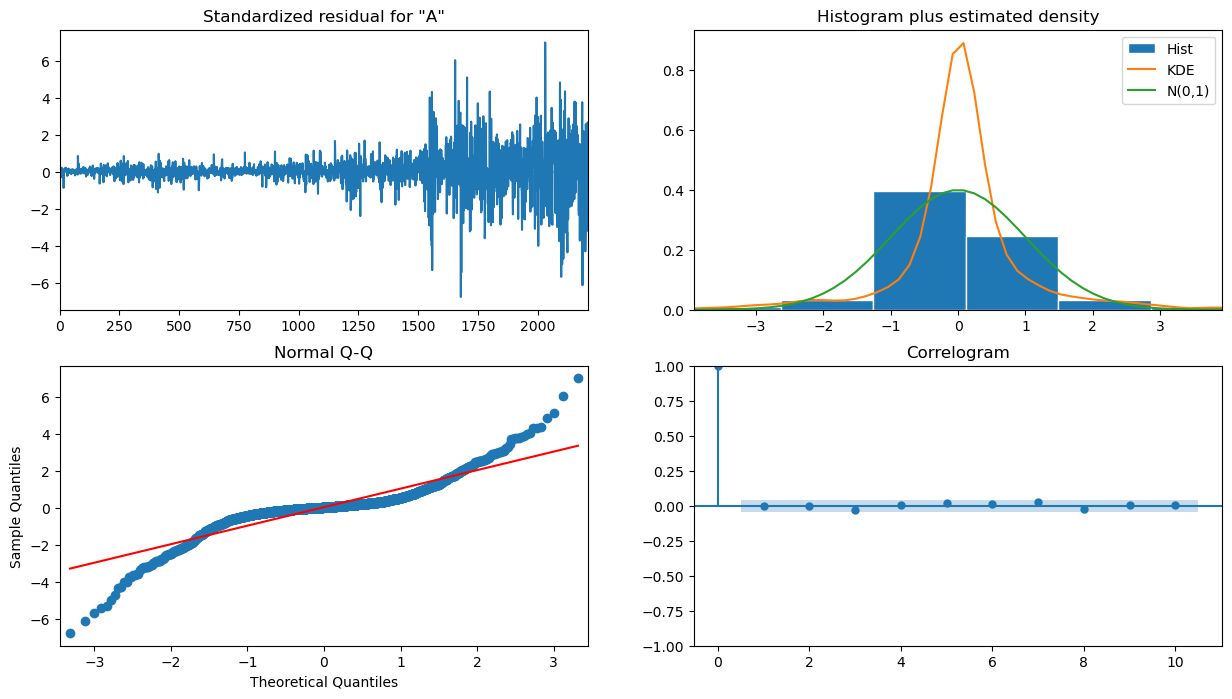

In [33]:
arima_model = SARIMAX(train, order=(4,1,6), simple_differencing=False)
arima_model = arima_model.fit(disp=False)
arima_model.plot_diagnostics(figsize=(15,8))

In [34]:
residuals = arima_model.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,20,1))
print(pvalue)

      lb_stat  lb_pvalue
1    0.000018   0.996594
2    0.000955   0.999522
3    2.083596   0.555239
4    2.126046   0.712589
5    2.615892   0.758949
6    2.817595   0.831368
7    4.277160   0.747358
8    5.371074   0.717278
9    5.472040   0.791373
10   5.480149   0.856887
11  10.419101   0.493129
12  10.896716   0.537790
13  12.015489   0.526374
14  12.163528   0.593172
15  12.197281   0.664039
16  12.763672   0.689952
17  12.778677   0.750872
18  15.462464   0.630006
19  17.744147   0.539585


Looks good. We can conclude that our residuals resemble white noise. That means our model captured the pattern effectively leaving just random white noise. 

# Forecasting

In [35]:
def rolling_forecast(data: pd.Series, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    predictions = []

    for i in range(train_len, total_len, window):
        train_data = data[:i]
        
        if method == 'mean':
            mean_val = np.mean(train_data.values)
            predictions.extend([mean_val] * window)
        
        elif method == 'ARIMA':
            model = SARIMAX(train_data, order=(4, 1, 6))
            res = model.fit(disp=False)
            forecast = res.get_forecast(steps=window)
            pred_mean = forecast.predicted_mean
            predictions.extend(pred_mean)
        
        if len(predictions) >= horizon:
            break

    return predictions[:horizon]

# Predicting the next year stock prices of Apple Stock - From 2022-10-18 to 2023-10-31

In [49]:
TRAIN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_arima = rolling_forecast(data['Adj Close'], TRAIN, HORIZON, WINDOW, 'ARIMA')

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Drew\anaconda3\Lib\site-pac

In [50]:
predicted_data = pd.DataFrame({'Actual Data': data['Adj Close'][-261:]})
predicted_data.head()

,Actual Data
Date,
2022-10-18,142.714233
2022-10-19,142.823425
2022-10-20,142.356827
2022-10-21,146.208862
2022-10-24,148.373138


In [51]:
predicted_data['Predicted Data'] = pred_arima
predicted_data.head()

,Actual Data,Predicted Data
Date,,
2022-10-18,142.714233,140.712281
2022-10-19,142.823425,141.180533
2022-10-20,142.356827,143.069478
2022-10-21,146.208862,143.230333
2022-10-24,148.373138,146.476951


In [52]:
predicted_data.head(20)

,Actual Data,Predicted Data
Date,,
2022-10-18,142.714233,140.712281
2022-10-19,142.823425,141.180533
2022-10-20,142.356827,143.069478
2022-10-21,146.208862,143.230333
2022-10-24,148.373138,146.476951
2022-10-25,151.242340,145.568691
2022-10-26,148.273880,151.287390
2022-10-27,143.756668,150.569658
2022-10-28,154.617844,144.995435


In [53]:
predicted_data.tail()

,Actual Data,Predicted Data
Date,,
2023-10-25,170.874893,173.030601
2023-10-26,166.670425,173.280824
2023-10-27,167.998672,166.475631
2023-10-30,170.065933,167.061218
2023-10-31,170.545319,169.661822


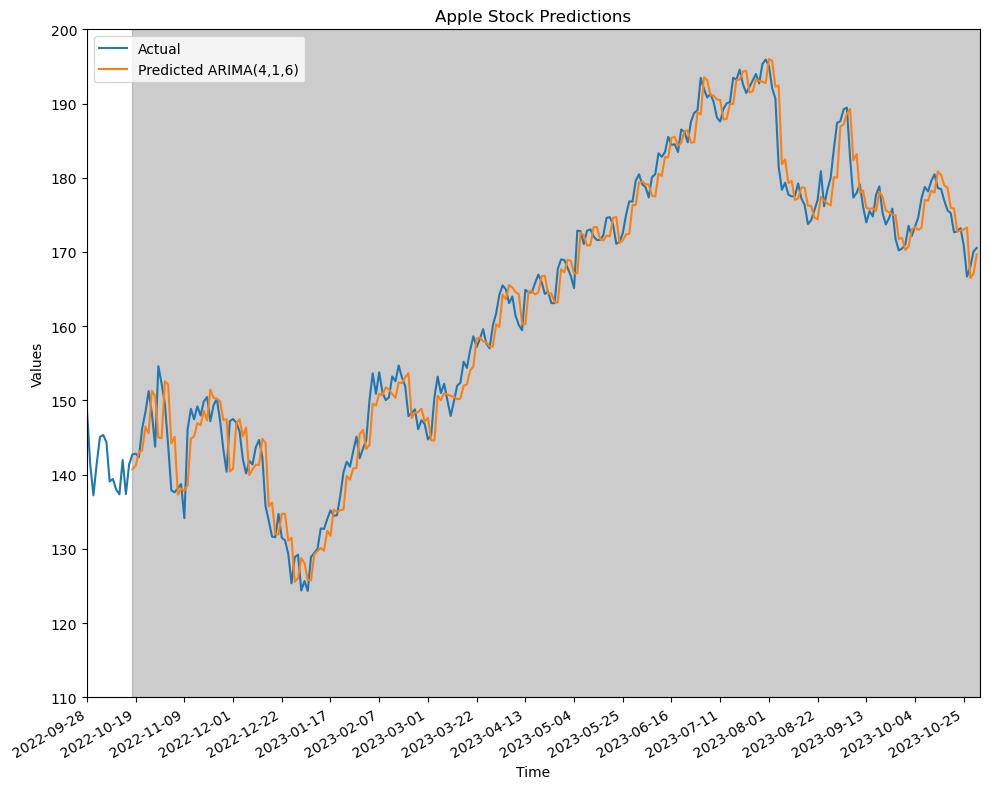

In [54]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Adj Close'], label='Actual')
ax.plot(predicted_data['Predicted Data'], label='Predicted ARIMA(4,1,6)')
ax.set_title('Apple Stock Predictions')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend(loc=2)
ax.set_xlim(2200, 2475)
ax.set_ylim(110,200)
ax.axvspan(2214, 2475, color="#808080", alpha=0.4)
pt.xticks(np.arange(2200, 2475,15))
fig.autofmt_xdate()
pt.tight_layout()

In [55]:
mse = mean_squared_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9.075791705790298


In [56]:
mae = mean_absolute_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2.356761359958703


In [57]:
var = predicted_data['Predicted Data'].std()**2
print(f' Variance: {var}')

 Variance: 350.6000782845434


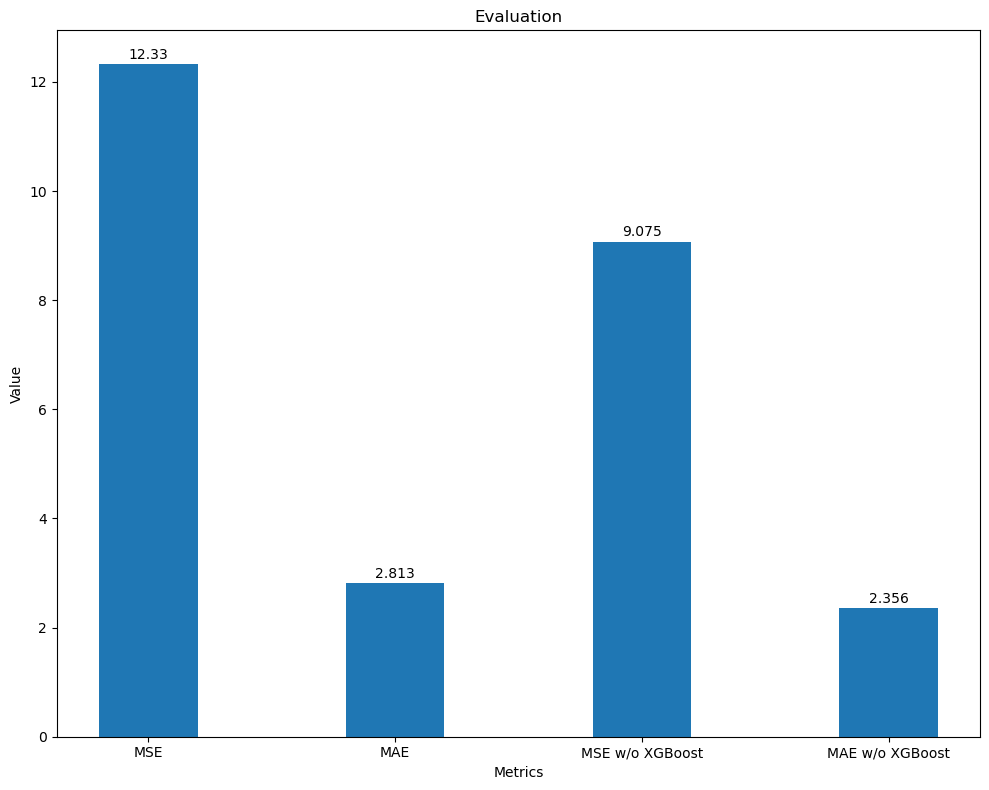

In [3]:
fig, ax = pt.subplots(figsize=(10,8))

X = ['MSE', 'MAE','MSE w/o XGBoost', 'MAE w/o XGBoost']
y = [12.33, 2.813,9.075, 2.356]

ax.bar(X,y, width=0.4)
ax.set_title('Evaluation')
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')

for index, value in enumerate(y):
    pt.text(x=index, y=value + 0.1, s=str(value), ha='center')

pt.tight_layout()

The performance of the model turns out to yield good predictions. The model is able to fit the data even better than using multiple features without overfitting and its able to capture the pattern. Also, it has an even lower MSE and MAE scoring.